In [2]:
import pandas as pd
pd.set_option('display.max_column', 250)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-notebook')
from matplotlib import rcParams
rcParams['figure.dpi'] = 150

In [3]:
import arff
data = arff.load(open('../data/RBF.arff'))
cnames = [i[0] for i in data['attributes']]
df = pd.DataFrame(data['data'], columns=cnames)
df.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,class
0,0.249236,1.041160,0.123459,0.294866,0.492433,0.258829,0.244698,0.409868,0.606464,0.308719,class2
1,0.697460,0.655077,0.390740,0.379296,0.499011,0.950763,0.769168,0.731948,0.818317,0.805957,class2
2,0.315775,0.555033,0.437252,0.597836,0.822930,0.104913,0.747029,0.512942,0.482010,0.112829,class2
3,0.526692,0.127093,0.608988,-0.014112,0.915098,0.793375,0.948794,0.112425,0.088916,0.700397,class1
4,0.408540,0.536533,0.301184,0.585808,0.299471,0.987396,0.138013,0.418470,-0.047781,0.834338,class1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
att1     50000 non-null float64
att2     50000 non-null float64
att3     50000 non-null float64
att4     50000 non-null float64
att5     50000 non-null float64
att6     50000 non-null float64
att7     50000 non-null float64
att8     50000 non-null float64
att9     50000 non-null float64
att10    50000 non-null float64
class    50000 non-null object
dtypes: float64(10), object(1)
memory usage: 4.2+ MB


In [3]:
df.describe()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.506085,0.514123,0.498927,0.508756,0.480694,0.509604,0.501413,0.534122,0.494289,0.511460
std,0.344157,0.348055,0.344847,0.348407,0.340913,0.356393,0.358515,0.355438,0.346017,0.345217
min,-1.179587,-1.139089,-1.609693,-1.288257,-1.297713,-1.375325,-1.207452,-1.552437,-1.257884,-1.097906
25%,0.249691,0.248892,0.237339,0.247556,0.233768,0.231753,0.219131,0.266343,0.234327,0.250429
50%,0.502150,0.519754,0.502101,0.502844,0.458065,0.517009,0.497395,0.534136,0.487824,0.522222
75%,0.776179,0.772265,0.766914,0.771240,0.735447,0.791999,0.786391,0.816321,0.758943,0.780541
max,2.536609,2.288699,2.324599,2.264245,2.186929,2.309362,2.265891,2.236981,2.507053,2.281663


In [5]:
df.groupby('class')['class'].count()

class
class1    25044
class2    24956
Name: class, dtype: int64

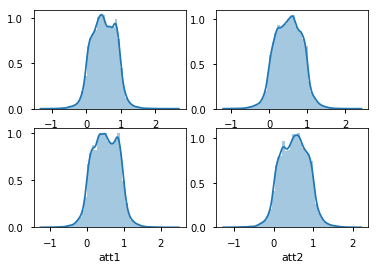

In [6]:
f, axes = plt.subplots(2, 2)

for i in range(2):
    sns.distplot(df.iloc[:25000,i], ax=axes[0,i])
    sns.distplot(df.iloc[25000:,i], ax=axes[1,i])

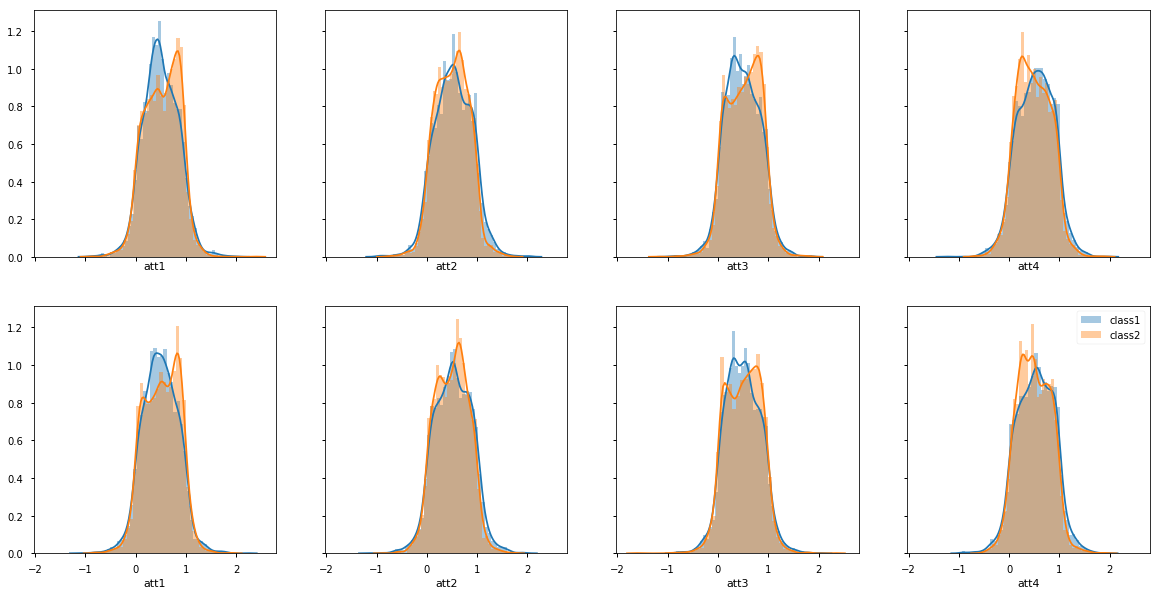

In [4]:
rcParams['figure.figsize'] = (20, 10)
#todo. this does not work. Make it classwise
f, axes = plt.subplots(2, 4, sharex=True, sharey=True)

for i in range(4):
    sns.distplot(df[df['class']=='class1'].loc[:10000,'att'+str(i+1)], ax=axes[0,i], label='class1')
    sns.distplot(df[df['class']=='class2'].loc[:10000,'att'+str(i+1)], ax=axes[0,i], label='class2')
    sns.distplot(df[df['class']=='class1'].loc[40000:,'att'+str(i+1)], ax=axes[1,i], label='class1')
    sns.distplot(df[df['class']=='class2'].loc[40000:,'att'+str(i+1)], ax=axes[1,i], label='class2')

plt.legend()
plt.savefig('RBF_dist.png', dpi=300)